In [ ]:
#importing the basic librairies
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd
import scipy
#import unidecode
# Visualization 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import missingno #missing values , deal with text
import seaborn as sns
plt.style.use('seaborn-whitegrid')

import neattext.functions as nfx

import wordcloud

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

#Matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
import itertools

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import re
import string
from sklearn.metrics import classification_report
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

### EDA

In [ ]:
# faut commencer d'abord par fichier train puis test
df=pd.read_csv("Constraint_English_Train.csv")

In [ ]:
#fichier test
dft=pd.read_csv("Constraint_English_Test.csv")

In [ ]:
dfS=pd.read_csv('covid19_tweets.csv')

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.YlOrBr):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
df.head(7)

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real
5,6,"Covid Act Now found ""on average each person in...",real
6,7,If you tested positive for #COVID19 and have n...,real


In [ ]:
df.shape

(6420, 3)

In [ ]:
df.columns

Index(['id', 'tweet', 'label'], dtype='object')

In [ ]:
#enlever la premiere colonne
df=df.drop(['id'],axis=1)

In [ ]:
df.head(7)

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real
2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,Populous states can generate large case counts...,real
5,"Covid Act Now found ""on average each person in...",real
6,If you tested positive for #COVID19 and have n...,real


In [ ]:
df["label"].value_counts()

real    3360
fake    3060
Name: label, dtype: int64

### we will define df1 as the same df but with dummy variables

In [ ]:
df1 = df.copy(deep=True)

In [ ]:
df.head(7)

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real
2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,Populous states can generate large case counts...,real
5,"Covid Act Now found ""on average each person in...",real
6,If you tested positive for #COVID19 and have n...,real


In [ ]:
df1['label'] = df1['label'].map({'real': 1,'fake': 0})

In [ ]:
df1.head()

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,1
1,States reported 1121 deaths a small rise from ...,1
2,Politically Correct Woman (Almost) Uses Pandem...,0
3,#IndiaFightsCorona: We have 1524 #COVID testin...,1
4,Populous states can generate large case counts...,1


In [ ]:
df.head()

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real
2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,Populous states can generate large case counts...,real


### Data Cleaning

#### Data  cleaning for DF1 => dummy variables 

In [ ]:
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [ ]:
import neattext.functions as nfx

In [ ]:
#let's start first by cleaning the text of the hashtags
#extract the hashtags within the text
df1['tweet'].apply(nfx.extract_hashtags)

0                                                      []
1                                                      []
2                              [#coronavirus, #nashville]
3       [#IndiaFightsCorona:, #COVID, #StaySafe, #Indi...
4                                                      []
                              ...                        
6415                                                   []
6416                                                   []
6417                                                   []
6418                                                   []
6419                                                   []
Name: tweet, Length: 6420, dtype: object

In [ ]:
df1['tweet'].apply(nfx.remove_urls)

0       The CDC currently reports 99031 deaths. In gen...
1       States reported 1121 deaths a small rise from ...
2       Politically Correct Woman (Almost) Uses Pandem...
3       #IndiaFightsCorona: We have 1524 #COVID testin...
4       Populous states can generate large case counts...
                              ...                        
6415    A tiger tested positive for COVID-19 please st...
6416    ???Autopsies prove that COVID-19 is??� a blood...
6417    _A post claims a COVID-19 vaccine has already ...
6418    Aamir Khan Donate 250 Cr. In PM Relief Cares Fund
6419    It has been 93 days since the last case of COV...
Name: tweet, Length: 6420, dtype: object

In [ ]:
df1['tweet'].apply(nfx.remove_puncts)

0       The CDC currently reports 99031 deaths In gene...
1       States reported 1121 deaths a small rise from ...
2       Politically Correct Woman (Almost) Uses Pandem...
3       #IndiaFightsCorona: We have 1524 #COVID testin...
4       Populous states can generate large case counts...
                              ...                        
6415    A tiger tested positive for COVID19 please sta...
6416    Autopsies prove that COVID19 is� a blood clot ...
6417    A post claims a COVID19 vaccine has already be...
6418     Aamir Khan Donate 250 Cr In PM Relief Cares Fund
6419    It has been 93 days since the last case of COV...
Name: tweet, Length: 6420, dtype: object

In [ ]:
df1['tweet'].apply(nfx.remove_special_characters)

0       The CDC currently reports 99031 deaths In gene...
1       States reported 1121 deaths a small rise from ...
2       Politically Correct Woman Almost Uses Pandemic...
3       IndiaFightsCorona We have 1524 COVID testing l...
4       Populous states can generate large case counts...
                              ...                        
6415    A tiger tested positive for COVID19 please sta...
6416    Autopsies prove that COVID19 is a blood clot n...
6417    A post claims a COVID19 vaccine has already be...
6418     Aamir Khan Donate 250 Cr In PM Relief Cares Fund
6419    It has been 93 days since the last case of COV...
Name: tweet, Length: 6420, dtype: object

In [ ]:
df1['tweet'].apply(nfx.remove_numbers)

0       The CDC currently reports  deaths. In general ...
1       States reported  deaths a small rise from last...
2       Politically Correct Woman (Almost) Uses Pandem...
3       #IndiaFightsCorona: We have  #COVID testing la...
4       Populous states can generate large case counts...
                              ...                        
6415    A tiger tested positive for COVID- please stay...
6416    ???Autopsies prove that COVID- is??� a blood c...
6417    _A post claims a COVID- vaccine has already be...
6418       Aamir Khan Donate  Cr. In PM Relief Cares Fund
6419    It has been  days since the last case of COVID...
Name: tweet, Length: 6420, dtype: object

In [ ]:
df1["tweet"] = df1["tweet"].apply(word_drop)

#### Data  cleaning for DF 

In [ ]:
df['tweet'].apply(nfx.extract_hashtags)

0                                                      []
1                                                      []
2                              [#coronavirus, #nashville]
3       [#IndiaFightsCorona:, #COVID, #StaySafe, #Indi...
4                                                      []
                              ...                        
6415                                                   []
6416                                                   []
6417                                                   []
6418                                                   []
6419                                                   []
Name: tweet, Length: 6420, dtype: object

In [ ]:
df['tweet'].apply(nfx.remove_urls)

0       The CDC currently reports 99031 deaths. In gen...
1       States reported 1121 deaths a small rise from ...
2       Politically Correct Woman (Almost) Uses Pandem...
3       #IndiaFightsCorona: We have 1524 #COVID testin...
4       Populous states can generate large case counts...
                              ...                        
6415    A tiger tested positive for COVID-19 please st...
6416    ???Autopsies prove that COVID-19 is??� a blood...
6417    _A post claims a COVID-19 vaccine has already ...
6418    Aamir Khan Donate 250 Cr. In PM Relief Cares Fund
6419    It has been 93 days since the last case of COV...
Name: tweet, Length: 6420, dtype: object

In [ ]:
df['tweet'].apply(nfx.remove_puncts)

0       The CDC currently reports 99031 deaths In gene...
1       States reported 1121 deaths a small rise from ...
2       Politically Correct Woman (Almost) Uses Pandem...
3       #IndiaFightsCorona: We have 1524 #COVID testin...
4       Populous states can generate large case counts...
                              ...                        
6415    A tiger tested positive for COVID19 please sta...
6416    Autopsies prove that COVID19 is� a blood clot ...
6417    A post claims a COVID19 vaccine has already be...
6418     Aamir Khan Donate 250 Cr In PM Relief Cares Fund
6419    It has been 93 days since the last case of COV...
Name: tweet, Length: 6420, dtype: object

In [ ]:
df['tweet'].apply(nfx.remove_special_characters)

0       The CDC currently reports 99031 deaths In gene...
1       States reported 1121 deaths a small rise from ...
2       Politically Correct Woman Almost Uses Pandemic...
3       IndiaFightsCorona We have 1524 COVID testing l...
4       Populous states can generate large case counts...
                              ...                        
6415    A tiger tested positive for COVID19 please sta...
6416    Autopsies prove that COVID19 is a blood clot n...
6417    A post claims a COVID19 vaccine has already be...
6418     Aamir Khan Donate 250 Cr In PM Relief Cares Fund
6419    It has been 93 days since the last case of COV...
Name: tweet, Length: 6420, dtype: object

In [ ]:
df['tweet'].apply(nfx.remove_numbers)

0       The CDC currently reports  deaths. In general ...
1       States reported  deaths a small rise from last...
2       Politically Correct Woman (Almost) Uses Pandem...
3       #IndiaFightsCorona: We have  #COVID testing la...
4       Populous states can generate large case counts...
                              ...                        
6415    A tiger tested positive for COVID- please stay...
6416    ???Autopsies prove that COVID- is??� a blood c...
6417    _A post claims a COVID- vaccine has already be...
6418       Aamir Khan Donate  Cr. In PM Relief Cares Fund
6419    It has been  days since the last case of COVID...
Name: tweet, Length: 6420, dtype: object

In [ ]:
df["tweet"] = df["tweet"].apply(word_drop)

In [ ]:
df.head(7)

,tweet,label
0,the cdc currently reports deaths in general ...,real
1,states reported deaths a small rise from last...,real
2,politically correct woman almost uses pandem...,fake
3,indiafightscorona we have covid testing la...,real
4,populous states can generate large case counts...,real
5,covid act now found on average each person in...,real
6,if you tested positive for and have no sympt...,real


### WORDCLOUD

In [ ]:
from nltk import pos_tag
import nltk, os, re, string
from nltk.corpus import wordnet
from nltk.corpus import stopwords
## A. TOTAL NUMBER OF WORDS USED 
df['nb_words'] = df['tweet'].apply(lambda x: len(x.split()))

## B. TOTAL NUMBER OF UNIQUE WORDS USED
df['nb_unique_words'] = df['tweet'].apply(lambda x: len(set(x.split())))

## C. TOTAL NUMBER OF CHARACTERS USED
df['nb_char'] = df['tweet'].apply(lambda x: len(x))

# D. TOTAL SPECIAL CHARACTERS USED

df["nb_special"] = df.apply(lambda p: sum( not q.isalpha() for q in p["tweet"] ), axis=1)

## D. TOTAL NUMBER OF PUNCTUATION USED
def punct(text):
    return(len([w for w in text.split() if w in list(string.punctuation)]))
df['nb_punct'] = df['tweet'].apply(lambda x: punct(x))

## E. TOTAL NUMBER OF STOPWORDS USED
stopword = stopwords.words('english')
def stop(text):
    return(len([w for w in text.split() if w in stopword]))
df['nb_stopwords'] = df['tweet'].apply(lambda x: stop(x))

## F. TOTAL NUMBER OF TITLE WORDS USED
def title(text):
    return(len([w for w in text.split() if w.istitle()]))
df['nb_title_case'] = df['tweet'].apply(lambda x: title(x))

## G. TOTAL NUMBER OF UPPERCASE WORDS USED
def upper(text):
    return(len([w for w in text.split() if w.isupper()]))
df['nb_title_case'] = df['tweet'].apply(lambda x: upper(x))

## H. NUMBER OF MOST FREQUENT TERMS
token = nltk.word_tokenize(''.join(df['tweet']))
frequent = nltk.FreqDist(token)
frequent.most_common(15)

[('the', 6910),
 ('t', 4703),
 ('of', 4619),
 ('co', 4399),
 ('https', 4396),
 ('to', 4131),
 ('in', 3892),
 ('a', 3058),
 ('and', 2753),
 ('covid', 2136),
 ('is', 2059),
 ('for', 1831),
 ('cases', 1742),
 ('coronavirus', 1596),
 ('are', 1514)]

In [ ]:
## REMOVING PUNCTUATION AND STOPWORDS FROM MOST FREQUENT WORDS
for sym in string.punctuation:
    del frequent[sym]
for word in stopword:
    del frequent[word]
frequent.most_common(15)

[('co', 4399),
 ('https', 4396),
 ('covid', 2136),
 ('cases', 1742),
 ('coronavirus', 1596),
 ('new', 1085),
 ('people', 748),
 ('tests', 706),
 ('deaths', 665),
 ('states', 610),
 ('total', 540),
 ('number', 535),
 ('confirmed', 519),
 ('india', 512),
 ('amp', 480)]

In [ ]:
## I. NUMBER OF WORDS CONTAIN OUT OF MOST COMMON 100 WORDS 
freq_words = list(dict(frequent.most_common()[:100]).keys())
def freq(text):
    return(len([w for w in text.split() if w in freq_words]))
df['nb_freq_words'] = df['tweet'].apply(lambda x: freq(x))

In [ ]:
df.head(7)

,tweet,label,nb_words,nb_unique_words,nb_char,nb_special,nb_punct,nb_stopwords,nb_title_case,nb_freq_words
0,the cdc currently reports deaths in general ...,real,27,23,179,31,0,9,0,6
1,states reported deaths a small rise from last...,real,18,15,112,24,0,5,0,9
2,politically correct woman almost uses pandem...,fake,18,18,121,24,0,4,0,4
3,indiafightscorona we have covid testing la...,real,24,23,174,39,0,9,0,8
4,populous states can generate large case counts...,real,43,39,220,48,0,12,0,13
5,covid act now found on average each person in...,real,44,39,252,53,0,19,0,10
6,if you tested positive for and have no sympt...,real,38,32,215,49,0,20,0,11


In [ ]:
## J. AVERAGE OF FREQ TERMS WITH TOTAL WORDS USED
freq_words = list(dict(frequent.most_common()[:100]).keys())
def freq(text):
    return(len([w for w in text.split() if w in freq_words])/len(text.split()))
df['avg_freq_word']= df['tweet'].apply(lambda x: freq(x))

In [ ]:
df.head()

,tweet,label,nb_words,nb_unique_words,nb_char,nb_special,nb_punct,nb_stopwords,nb_title_case,nb_freq_words,avg_freq_word
0,the cdc currently reports deaths in general ...,real,27,23,179,31,0,9,0,6,0.222222
1,states reported deaths a small rise from last...,real,18,15,112,24,0,5,0,9,0.500000
2,politically correct woman almost uses pandem...,fake,18,18,121,24,0,4,0,4,0.222222
3,indiafightscorona we have covid testing la...,real,24,23,174,39,0,9,0,8,0.333333
4,populous states can generate large case counts...,real,43,39,220,48,0,12,0,13,0.302326


<AxesSubplot:xlabel='label', ylabel='count'>

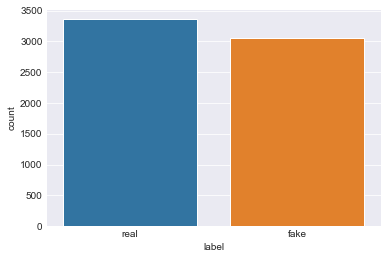

In [ ]:
sns.set_style("darkgrid")
sns.countplot(df.label)

In [ ]:
df_fake = df[df['label']=='fake']
df_true = df[df['label']=='real']

In [ ]:
df_fake.head(7)

,tweet,label,nb_words,nb_unique_words,nb_char,nb_special,nb_punct,nb_stopwords,nb_title_case,nb_freq_words,avg_freq_word
2,politically correct woman almost uses pandem...,fake,18,18,121,24,0,4,0,4,0.222222
7,obama calls trump s coronavirus response a cha...,fake,13,13,83,14,0,3,0,4,0.307692
8,clearly the obama administration did not l...,fake,16,16,100,23,0,7,0,1,0.062500
9,retraction hydroxychloroquine or chloroquine w...,fake,22,20,158,28,0,9,0,3,0.136364
11,the nba is poised to restart this month in ma...,fake,40,34,196,49,0,19,0,9,0.225000
16,because of donald trump s negligence and incom...,fake,37,31,229,54,0,20,0,7,0.189189
19,multiple facebook posts claim that aussies wi...,fake,40,34,239,44,0,21,0,0,0.000000


<AxesSubplot:ylabel='Frequency'>

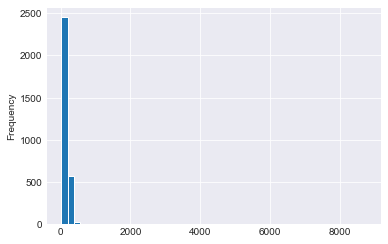

In [ ]:
df_fake['nb_char'].plot(bins=50, kind='hist')

In [ ]:
df_fake['nb_char'].describe()

<AxesSubplot:ylabel='Frequency'>

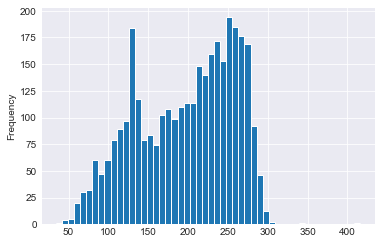

In [ ]:
df_true['nb_char'].plot(bins=50, kind='hist')

In [ ]:
df_true['nb_char'].describe()

As we can see, from above analysis average number of characters in a sentence in real news is around 207 while in case of fake news it is around 112 which is but obvious because fake news generally use superflous language with more characters to grab the attention

<AxesSubplot:ylabel='Frequency'>

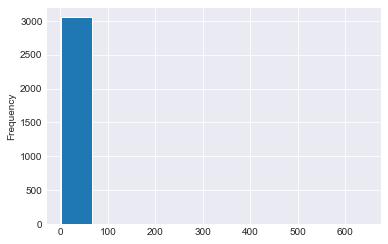

In [ ]:
df_fake['nb_unique_words'].plot(bins=10, kind='hist')

In [ ]:
df_fake['nb_unique_words'].describe()

count    3060.000000
mean       19.995098
std        17.287135
min         2.000000
25%        12.000000
50%        17.000000
75%        25.000000
max       644.000000
Name: nb_unique_words, dtype: float64

<AxesSubplot:ylabel='Frequency'>

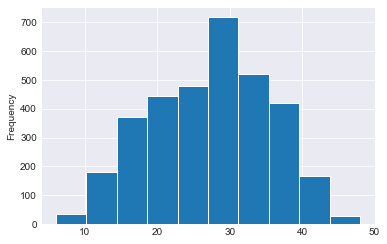

In [ ]:
df_true['nb_unique_words'].plot(bins=10, kind='hist')

In [ ]:
df_true['nb_unique_words'].describe()

As we can see average number of unique words in real headlines is relatively more in comparison to fake news

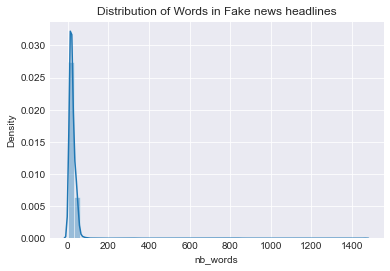

In [ ]:
# distribution of fake words in Headline
sns.distplot(df_fake['nb_words'])
plt.title("Distribution of Words in Fake news headlines")
plt.show()

In [ ]:
# distribution of  words in Real news Headline
sns.distplot(df_true['nb_words'])
plt.title("Distribution of Words in True news headlines")
plt.show()

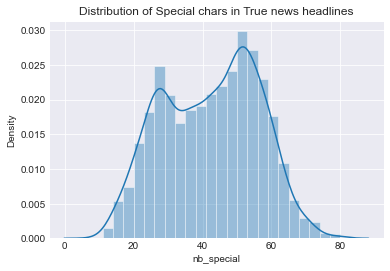

In [ ]:
# distribution of  special characters in Real news Headline
sns.distplot(df_true['nb_special'])
plt.title("Distribution of Special chars in True news headlines")
plt.show()

In [ ]:
# distribution of  special characters in Fake news Headline
sns.distplot(df_fake['nb_special'])
plt.title("Distribution of Special chars in Fake news headlines")
plt.show()

In [ ]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

# Removing stop words which are unneccesary from headline news
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df['tweet']=df['tweet'].apply(remove_stopwords)

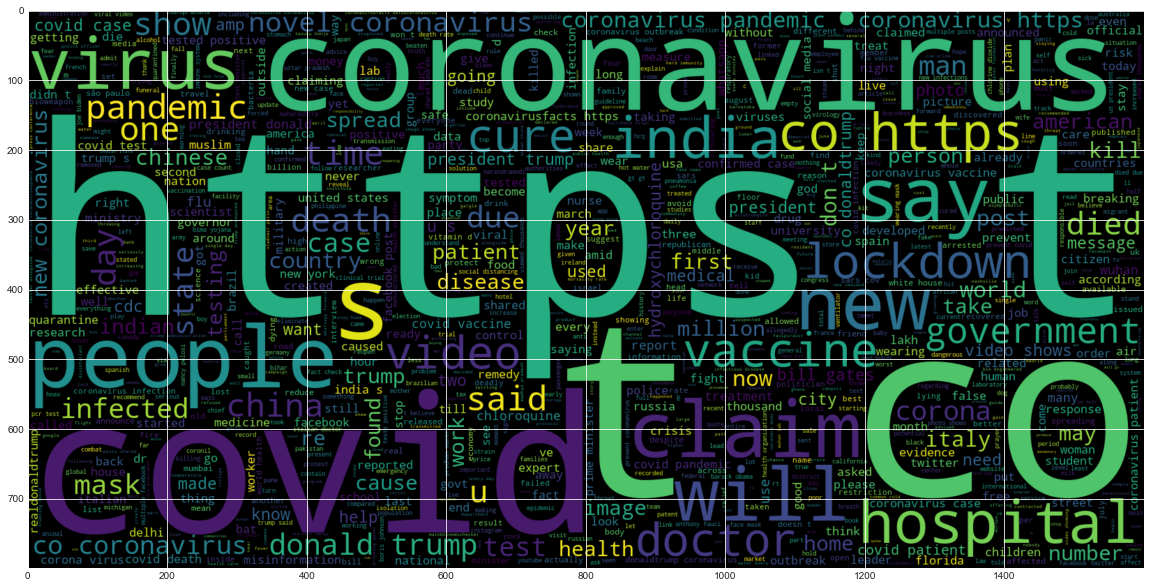

In [ ]:
from wordcloud import WordCloud,STOPWORDS
import itertools
df_fake.replace('https','')
df_fake.replace('co','')
df_fake.replace('t','')
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df_fake['tweet']))
plt.imshow(wc , interpolation = 'bilinear')

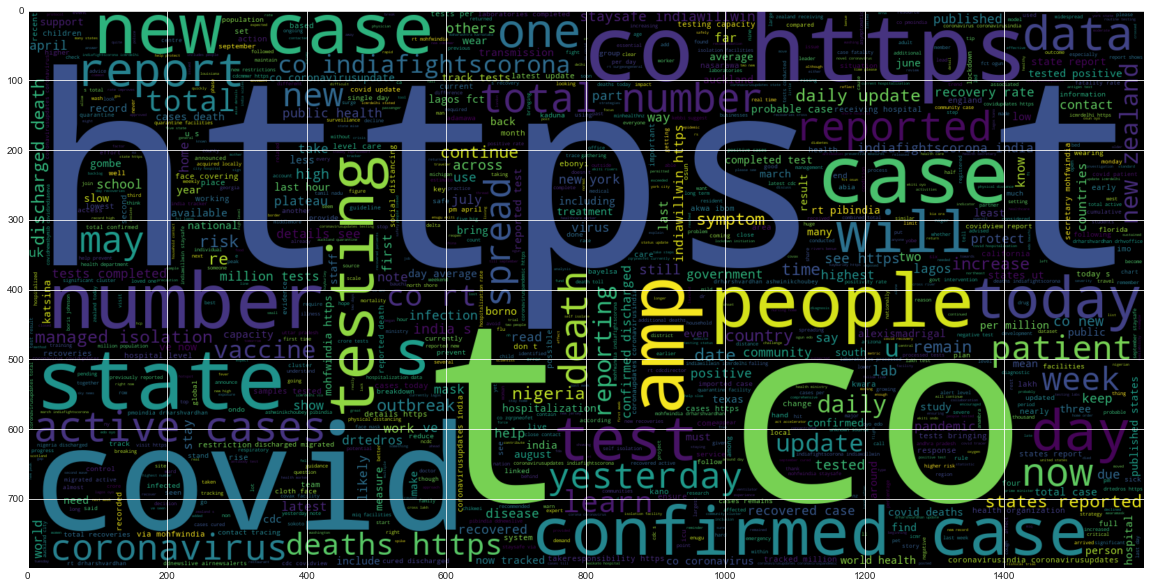

In [ ]:
plt.figure(figsize = (20,20)) # Text that is True News Headlines
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df_true['tweet']))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
nlp = spacy.load('en_core_web_md')

In [ ]:
txt = df["tweet"][1]
txt

'states reported deaths small rise last tuesday southern states reported deaths https co'

In [ ]:
doc = nlp(txt)    
olist = []
for token in doc:
    l = [token.text,
        token.idx,
        token.lemma_,
        token.is_punct,
        token.is_space,
        token.shape_,
        token.pos_,
        token.tag_]
    olist.append(l)
    
odf = pd.DataFrame(olist)
odf.columns= ["Text", "StartIndex", "Lemma", "IsPunctuation", "IsSpace", "WordShape", "PartOfSpeech", "POSTag"]
odf

,Text,StartIndex,Lemma,IsPunctuation,IsSpace,WordShape,PartOfSpeech,POSTag
0,states,0,state,False,False,xxxx,NOUN,NNS
1,reported,7,report,False,False,xxxx,VERB,VBD
2,deaths,16,death,False,False,xxxx,NOUN,NNS
3,small,23,small,False,False,xxxx,ADJ,JJ
4,rise,29,rise,False,False,xxxx,NOUN,NN
5,last,34,last,False,False,xxxx,ADJ,JJ
6,tuesday,39,tuesday,False,False,xxxx,NOUN,NN
7,southern,47,southern,False,False,xxxx,ADJ,JJ
8,states,56,state,False,False,xxxx,NOUN,NNS
9,reported,63,report,False,False,xxxx,VERB,VBD


So using "nlp" we got a lot of information. The details are as follows:

- Text - Tokenized word
- StartIndex - Index at which the word starts in the sentence
- Lemma - Lemma of the word (we need not do lemmatization separately)
- IsPunctuation - Whether the given word is a punctuation or not
- IsSpace - Whether the given word is just a white space or not
- WordShape - Gives information about the shape of word (If all letters are in upper case, we will get XXXXX, if all in lower case then xxxxx, if the first letter is upper and others lower then Xxxxx and so on)
- PartOfSpeech - Part of speech of the word
- POSTag - Tag for part of speech of word

## Named Entity Recognition: NER

- A named entity is a "real-world object" that's assigned a name – for example, a person, a country, a product or a book title.

- We also get named entity recognition as part of spacy package. It is inbuilt in the english language model and we can also train our own entities if needed.

In [ ]:
doc = nlp(txt)
olist = []
for ent in doc.ents:
    olist.append([ent.text, ent.label_])
    
odf = pd.DataFrame(olist)
odf.columns = ["Text", "EntityType"]
odf

,Text,EntityType
0,last tuesday,DATE


In [ ]:
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

In [ ]:
txt = df["tweet"][9]
doc = nlp(txt)
colors = {'GPE': 'lightblue', 'NORP':'lightgreen'}
options = {'ents': ['GPE', 'NORP'], 'colors': colors}
displacy.render(doc, style='ent', jupyter=True, options=options)


In [ ]:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})